# Изучение рынка российского кинопроката  
Заказчик исследования — Министерство культуры Российской Федерации. 
Цель: изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю. 
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  
План исследования:    
Шаг 1 - Знакомство с датафреймами, подготовка к работе.   
Шаг 2 - Предобработка данных, работа с пропусками, явными, неявными дубликатами.   
Шаг 3 - Исследовательский анализ кинопроката. Анализ количества фильмов, кассовых сборах, жанров и категорий фильмов.  
Шаг 4 - Исследование популярности и прибыльности фильмов, получивших государственную поддержку.  
Шаг 5 - Общий вывод.

# Описание данных

Таблица <span style="color:blue"> mkrf_movies</span> содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.  
<span style="color:blue"> title</span> — название фильма;  
<span style="color:blue"> puNumber</span> — номер прокатного удостоверения;  
<span style="color:blue"> show_start_date</span>  — дата премьеры фильма;  
<span style="color:blue"> type</span> — тип фильма;  
<span style="color:blue"> film_studio</span> — студия-производитель;  
<span style="color:blue"> production_country</span> — страна-производитель;  
<span style="color:blue"> director</span> — режиссёр;  
<span style="color:blue"> producer</span> — продюсер;  
<span style="color:blue"> age_restriction</span> — возрастная категория;   
<span style="color:blue"> refundable_support</span> — объём возвратных средств государственной поддержки;  
<span style="color:blue"> nonrefundable_support</span> — объём невозвратных средств государственной поддержки;   
<span style="color:blue"> financing_source</span> — источник государственного финансирования;   
<span style="color:blue"> budget</span> — общий бюджет фильма;  
<span style="color:blue"> ratings</span> — рейтинг фильма на КиноПоиске;   
<span style="color:blue"> genres</span> — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.  
<span style="color:blue"> puNumber</span> — номер прокатного удостоверения;  
<span style="color:blue"> box_office</span> — сборы в рублях. 

# Шаг 1

Открытие файлов и объединение их в единый датафрейм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv')
    df_1 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data = pd.read_csv('E:/Yandex_Mary/yandex_practicum_ds_projects/russian_film_distribution/data/mkrf_movies.csv')
    df_1 = pd.read_csv('E:/Yandex_Mary/yandex_practicum_ds_projects/russian_film_distribution/data/mkrf_shows.csv')
    
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

print(display(data.head(5)), data.info())
print(display(df_1.head(5)),df_1.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None None


Представлены два датафрейма. Основной датафрейм содержит в себе 7486 строк, второй 3158, их объединяет общий столбец puNumber. Соединим эти датафреймы по данному столбцу предварительно изменив его тип на числовой, тк в основном датафрейме данный столбец относится к типу object.

In [3]:
# Привожу столбец puNumber к числовому типу
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce')
data = data.merge(df_1, how='left')

print(f'Проверяем длину датафрейма, длина датафрейма: {len(data)}')
#print(data.head(10))
data.head(10)

Проверяем длину датафрейма, длина датафрейма: 7486


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,"111,013,816.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,"111,007,013.00",2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,"221,074,614.00",2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,"121,011,416.00",2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,"111,019,114.00",2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


### 1.2. Промежуточный вывод

Объединили два датафрейма. К датафрейму с  информацией из реестра прокатных удостоверений присоединили датафрейм со сведениями о показах фильмов в российских кинотеатрах по столбцу puNumber. Получился единый датафрейм из 16 столбцов и 7486 строк.

# Шаг 2

### 2.1. Проверка и исправление типов данных

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [5]:
list_to_float=[ 'refundable_support','nonrefundable_support','budget','box_office']
for column in list_to_float:
    data[column] = data[column].astype('float')
    
list_to_category = ['age_restriction', 'genres', 'film_studio', 'production_country', 'puNumber']
for column in list_to_category:
    data[column] = data[column].astype('category')

In [6]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

In [7]:
# приведем данные ratings в однородный вид
# уберем знак % 
data['ratings'] = pd.to_numeric(data['ratings'].str.replace('%', '', regex=False))
data.loc[data['ratings'] > 10.0, 'ratings'] = data['ratings'] / 10
data['ratings'] = data['ratings'].astype('float')

<span style="color:blue"> puNumber, refundable_support, nonrefundable_support, budget, box_office, ratings</span> переведены в тип float. Так же столбец  <span style="color:blue"> show_start_date</span> приведен к типу datetime. Категориальные столбцы <span style="color:blue"> age_restriction, genres, film_studio, production_country</span> приняли тип category.

### 2.2 Работа с пропусками

In [8]:
#создаем копию датасета до предобработки данных
reference = data.copy()
len(reference)

7486

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
puNumber                    1
title                       0
show_start_date             0
type                        0
age_restriction             0
dtype: int64


Text(0, 0.5, 'Количество')

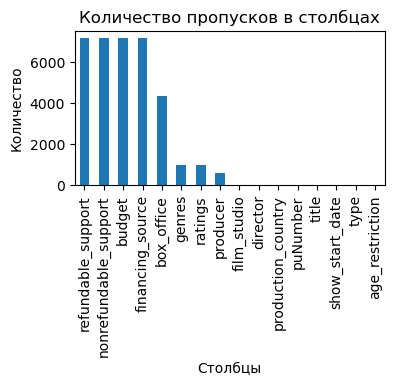

In [9]:
data_empty = data.isna().sum().sort_values(ascending=False)
print(data_empty)

data_empty.plot(kind='bar', figsize=(4,2), title='Количество пропусков в столбцах')
plt.xlabel('Столбцы')
plt.ylabel('Количество')

Выявим долю пропусков, чтобы принять решение по их обработке.

In [10]:
skip = data_empty / len(data)
skip

refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
box_office              0.58
genres                  0.13
ratings                 0.13
producer                0.08
film_studio             0.00
director                0.00
production_country      0.00
puNumber                0.00
title                   0.00
show_start_date         0.00
type                    0.00
age_restriction         0.00
dtype: float64

<span style="color:blue"> nonrefundable_support, refundable_support, budget</span> - 96% пропусков, можно заполнить пропуски на "0".  
<span style="color:blue">financing_source</span> - тоже 96% пропусков, так как это столбец содержит источник финансирования, можно сделать вывод, что пропуски, означают, что фильмы сняты на коммерческой основе, можно заполнить пропуски значением "Коммерческий фильм".  
<span style="color:blue">box_office</span> - 58% пропусков, это означает, что просто нет данных о кассовых сборах, заполненять пропуски не вижу смысла, исказит дальнейшие расчеты.
<span style="color:blue">genres</span> - 13% пропусков, нет данных о жанре, восстановить вручную эти данные не получится, оставим пропуски на месте.  
<span style="color:blue">ratings</span> - 13% пропусков, нет данных о рейтинге, восстановить вручную эти данные не получится, оставим пропуски на месте.  
<span style="color:blue">producer</span> - 8% пропусков, нет данных о рейтинге, восстановить вручную эти данные не получится, оставим пропуски на месте. 

In [11]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['refundable_support'] = data['refundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['financing_source'] = data['financing_source'].fillna('Коммерческий фильм')
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий фильм,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Коммерческий фильм,6.60,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий фильм,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий фильм,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий фильм,6.80,"фантастика,боевик,триллер",NaN


Text(0, 0.5, 'Количество')

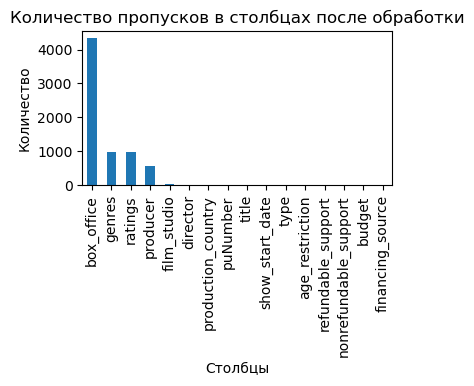

In [12]:
data_empty_1 = data.isna().sum().sort_values(ascending=False)

data_empty_1.plot(kind='bar', figsize=(4,2), title='Количество пропусков в столбцах после обработки')
plt.xlabel('Столбцы')
plt.ylabel('Количество')

Обработали все возможные столбцы с пропусками. 

### 2.3 Работа с дубликатами

In [13]:
print(f'Количество выявленных явных дубликатов: {data.duplicated().sum()}')

Количество выявленных явных дубликатов: 0


Посмотрим на количество уникальных значений в столбцах.

In [14]:
data.nunique()

title                    6772
puNumber                 7483
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    84
genres                    742
box_office               2938
dtype: int64

В столбце <span style="color:blue">puNumber</span> должно быть 7486 уникальных значений, но как мы видим их 7483. Изучим подробнее.

In [15]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.40,"комедия,криминал",NaN
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий фильм,6.80,"комедия,криминал",NaN


Два разных фильма с одинаковыми номерами. Заказчик предупреждал, что могут быть несколько прокатных удостоверений для одного фильма. Посмотрим.

In [16]:
display(data.query('title == "Анализируй то!"'))
display(data.query('title == "Анализируй это!"'))
display(data.query('title == "Как жениться и остаться холостым"'))
data[data['title'].str.contains('Иоанна')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий фильм,6.80,"комедия,криминал",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,"221,147,310.00",2010-12-15 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.40,"комедия,криминал",NaN
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.40,"комедия,криминал",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,"221,142,510.00",2010-12-03 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.00,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.00,"мелодрама,комедия",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,"121,005,410.00",2010-03-25 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.60,"драма,мелодрама,история",NaN
4513,Иоанна - женщина на папском престоле /По роман...,"221,141,710.00",2010-12-03 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.60,"драма,мелодрама,история",NaN
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий фильм,7.60,"драма,мелодрама,история",NaN


Фильмы с дублирующимися прокатными удостоверениями вышли в один день, скорее всего дело в технической ошибке. Оставим как есть. Это не дубликат, а ошибка, которая не повлияет на исследование.

### 2.4 Работа с категориальными столбцами

К категориальным столбцам относятся <span style="color:blue"> type, age_restriction, genres, film_studio, production_country </span>. Общая проблема категориальных столбцов заключается в том, что почти в каждом встречается ситуация мультизначений. За счет чего количество категорий расширяется. Например в столбце <span style="color:blue"> production_country </span> категоряи "Великобритания - Дания", которая по факту относится к категории "Дания" и к категории "Великобритания". Так же в подобных мультизначениях часто путаница с разделителями. Путают и ставят, то "-", то ",".

Исправим неявный дубликат в столбце <span style="color:blue"> type </span>.

In [17]:
data['type'] = (
    data['type']
    .str.replace(' ', '')
)
print(data['type'].value_counts())

type
Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: count, dtype: int64


In [18]:
data['age_restriction'].unique()

['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«0+» - для любой зрительской аудитории']
Categories (5, object): ['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей', '«6+» - для детей старше 6 лет']

В столбце <span style="color:blue"> age_restriction</span> со значениями все в порядке.

In [19]:
data['genres'].unique()

['боевик,драма,мелодрама', 'драма,военный', 'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия', ..., 'боевик,драма,триллер', 'документальный,военный,драма', 'драма,криминал,фильм-нуар', 'мультфильм,детский,приключения', 'мелодрама,история,драма']
Length: 743
Categories (742, object): ['аниме,мультфильм', 'аниме,мультфильм,боевик', 'аниме,мультфильм,детектив', 'аниме,мультфильм,драма', ..., 'фэнтези,триллер,мелодрама', 'фэнтези,триллер,приключения', 'фэнтези,ужасы', 'фэнтези,ужасы,триллер']

743 уникальных значения жанра. Звучит неудобно. Создадим новый столбец с первым жанром для удобства. Так же приведем к типу category.

In [20]:
data['main_genre'] = data['genres'].str.split(',').str[0].astype('category')
data['main_genre'].unique()

['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', ..., 'биография', 'вестерн', 'музыка', 'фильм-нуар', 'реальное ТВ']
Length: 29
Categories (28, object): ['аниме', 'биография', 'боевик', 'вестерн', ..., 'ужасы', 'фантастика', 'фильм-нуар', 'фэнтези']

Теперь у жанров 29 уникальных значений.

In [21]:
print(data['film_studio'].unique())
print(len(data['film_studio'].unique()))

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикч..., 'Киностудия "Мосфильм"', 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк П..., 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Инте..., 'Пульсар Продюксьон, ТФ1 Фильм ', ..., 'Свон Филмз', 'Севен Артс Продакшнз', 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Ко..., 'Никелодеон Анимейшн Студиос, Спин Мастер', 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']
Length: 5491
Categories (5490, object): [' АНО "Кинофорум"', ' Ауматик Интертейнмент, Блюмхаус Продакшнз и ..., ' ЗАО "Кинокомпания ФаворитФильм" по заказу ОО..., ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне..., ..., 'колорФИЛД Филм ГмбХ', 'ристалл Сити Интертейнмент, Эксклюзив Медиа Г..., 'совместное производство Киностудия "Мосфильм"..., 'юФилм, Твинпикс']
5491


5491 уникальное значение. В идеале, можно так же отделить название студии, которая стоит первой в строке, поменять знак "-", на "," но данные о студии не будут использоваться в нашем исследовании, поэтому оставим как есть. 

In [22]:
print(data['production_country'].unique())
len(data['production_country'].unique()) 

['США', 'СССР', 'Франция', 'СССР, Венгрия', 'Германия-Великобритания', ..., 'КНР - Франция', 'Дания, Норвегия, Швеция, Исландия', 'Республика Кипр, США, Россия', 'Новая Зеландия - КНР', 'Дания - Канада - Швеция - Франция - Германия ...]
Length: 951
Categories (950, object): [' СССР', ' СССР ', ' СССР   ', '2019', ..., 'Япония, Великобритания, Австрия, Германия, Ю...., 'Япония, США', 'Япония-Великобритания', 'Япония-США-Франция']


951

Проблема мультизначений о которых я писала выше. Предлагаю поменять "-" на ",", так же удалить все пробелы. Можно так же отделить название страны, которая стоит первой в строке, но эти данные не будут использоваться в нашем исследовании, поэтому оставим как есть.

### 2.5 Работа с количественными столбцами

К количественным столбцам относятся <span style="color:blue"> refundable_support, nonrefundable_support, budget, box_office, ratings</span>.

In [23]:
data.describe()

,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7486,"7,486.00","7,486.00","7,486.00","6,519.00","3,158.00"
mean,2015-02-20 20:43:36.083355392,"526,182.21","2,172,280.03","5,642,568.25",6.49,"76,478,696.16"
min,2010-01-11 12:00:00,0.00,0.00,0.00,1.00,0.00
25%,2012-07-05 12:00:00,0.00,0.00,0.00,5.90,"86,239.00"
50%,2015-03-05 12:00:00,0.00,0.00,0.00,6.60,"2,327,987.55"
75%,2017-11-30 12:00:00,0.00,0.00,0.00,7.20,"23,979,671.02"
max,2019-12-30 12:00:00,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"
std,NaN,"5,781,108.09","16,148,935.45","47,528,177.69",1.11,"240,353,122.82"


Смущают фильмы с бюджетом в "0". Посмотрим детальнее.

In [24]:
real_budget = data.query('budget < (nonrefundable_support + refundable_support)')
print(f'Фильмы с нулевым бюджетом: {len(real_budget)}')
real_budget

Фильмы с нулевым бюджетом: 17


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genre
2053,14+,"111,023,614.00",2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",мелодрама
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",драма
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",боевик
2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",комедия
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",мультфильм
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",комедия
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",комедия
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",комедия
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",комедия
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",фантастика


Имеется 17 фильмов, которые при наличии возвратной и невозвратной государственной поддержки имеют бюджет равный "0". 

Предлагаю фильмы с 0 бюджетом удалить. Скорее всего причина их возникновения в ошибке системы при выгрузке данных. Вряд ли это связано с опозданием подачи данных, тк проблемы с нулевым бюджетом имеются и у фильмов 2014 года и у 2019.

In [25]:
# удаляем строки budget равные 0
delite = (data['budget'] == 0) & ((data['refundable_support'] != 0) | (data['nonrefundable_support'] != 0))
data = data.drop(data[delite].index)

Проблема количественных данных еще наблюдалась в столбце <span style="color:blue"> ratings</span>. Мы исправили ошибку в предыдущих пунктах. Напомню, что имела ошибка в виде разных форматах рейтинга, были данные в десятичной форме и в сотых, мною было принято решение привести все оценки к 10-бальной шкале. Скорее всего данное разногласие в данных вызвано человеческой ошибкой при внесении данных, только если они не выгружаются автоматически с сайта "Кинопоиск", тогда ошибка технического характера.

### 2.6 Создание новых столбцов

Создадим новые столбцы <span style="color:blue"> year </span> - с годом проката, <span style="color:blue"> main_director</span> - с фамилией главного режиссера. Так же столбцы <span style="color:blue"> main_genre </span> -  столбец с основным жанром, <span style="color:blue"> share_of_support </span>- указывает какую долю от общего бюджета составляет государственная поддержка (возвратная и невозвратная).

In [26]:
data['year'] = data['show_start_date'].dt.year

data['main_director'] = data['director'].str.split(', ').str[0]
data['main_director'] = data['main_director'].str.lstrip()
data['share_of_support'] = (data['refundable_support']+data['nonrefundable_support']) / data['budget'].mask(data['budget'] == 0, data['budget'].mean())

### 2.7 Промежуточный вывод

**Цель:Предобработка данных**

**Задачи:**
1. Проверка и исправление типов данных.
2. Анализ и обработка пропусков.
3. Выявление и обработка дубликатов.
4. Исследование категориальных и количественных столбцов, а также обработка аномальных значений.
5. Создание новых столбцов для дальнейшей работы.

**Результаты предобработки данных:**

1. **Типы данных**:
- 6 столбцов были успешно преобразованы в тип `float`.
- Столбец `show_start_date` переведен в тип `datetime`.
- Категориальные столбцы были преобразованы в тип `category`.

2. **Обработка пропусков**:
- Пропущенные значения в столбцах `nonrefundable_support`, `refundable_support` и `budget` заменены на "0".
- Пропуски в столбце `financing_source` заполнены значением "Коммерческий фильм".

3. **Работа с дубликатами**:
- Выявлены дубликаты в столбце с номерами прокатных удостоверений. Решение: оставить без изменений.

4. **Анализ категориальных столбцов**:
- Обнаружена ситуация мультизначений, что приводит к расширению количества категорий.
- Выявлена путаница между знаками пробела и знаками "-", а также "," в мультизначениях.
- Все знаки "-" были заменены на ",".
- Созданы новые столбцы с первым значением в ячейке: `main_director` и `main_genre`.

5. **Обработка количественных столбцов**:
- Из данных удалены 17 строк с аномалиями,а именно с "0" в бюджете.
- Обработаны неверно внесенные показатели рейтинга: все значения в столбце рейтинга приведены к десятичному виду.

6. **Создание новых столбцов**:
- Создан новый столбец `year`, который содержит год проката.
- Создан столбец `share_of_support`, указывающий, какую долю от общего бюджета составляет государственная поддержка (возвратная и невозвратная).

**Заключение:**
В результате проведенной предобработки данных повышена их качество и готовность к дальнейшему анализу. Все выявленные проблемы были обработаны, что способствует более точным аналитическим выводам в последующих этапах работы.

# Шаг 3

### 3.1 Исследование года выхода в прокат.

In [27]:
data_nna = data[data['box_office'].notna()]
print(f'Количество фильмов с информацией о прокате: {len(data_nna)}')

Количество фильмов с информацией о прокате: 3141


Посмотрим какую долю составляют составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [28]:
print(f'Доля фильмов с информацией о прокате от общего числа фильмов: {data.box_office.notna().mean():.2f}')

Доля фильмов с информацией о прокате от общего числа фильмов: 0.42


Как доля менялась по годам.

year
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.34
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
Name: share_year, dtype: float64


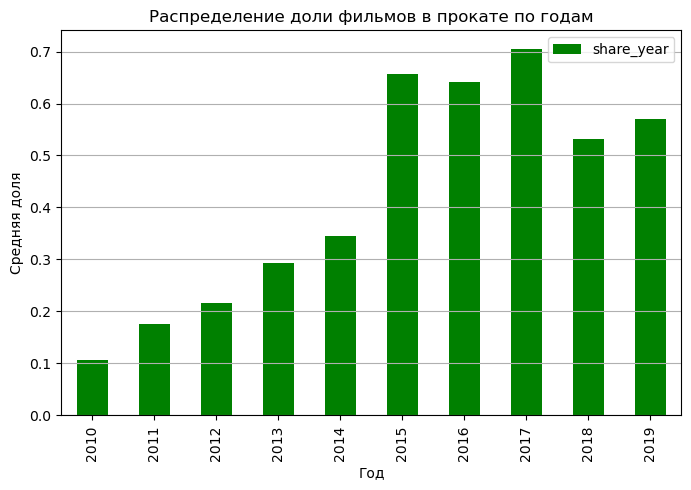

In [29]:
def share_year(data):
    count_per_year = data.groupby(by='year')['box_office'].count()
    total_count = data['year'].value_counts()
    share_year = count_per_year / total_count
    share_year.fillna(0, inplace=True)
    data['share_year'] = data['year'].map(share_year)
    return data
data = share_year(data)
sh_year = data.groupby('year')['share_year'].mean()
print(sh_year)

# строим гистограмму
summary = data.groupby('year')['share_year'].mean().reset_index()

summary.plot(
    kind='bar',
    x='year',
    y='share_year',
    color='green',
    figsize=(8, 5),
    title='Распределение доли фильмов в прокате по годам'
)

plt.xlabel('Год')
plt.ylabel('Средняя доля')
plt.grid(axis='y')
plt.show()

Полнее всего представлен 2017 год, доля фильмов с информацией о прокате составила более 0.7. Период с 2015 года до 2019 года представлен в среднем более чем на 0.5. Но последние два года (2018,2019) доля фильмов с информацией о прокате снизилась и держится в промежутке между 0.5 и 0.6. Посмотрим сколько всего фильмов было в прокате за эти года.

   year  count
0  2010    985
1  2019    929
2  2018    887
3  2016    815
4  2014    806
5  2015    699
6  2013    630
7  2011    622
8  2012    593
9  2017    503


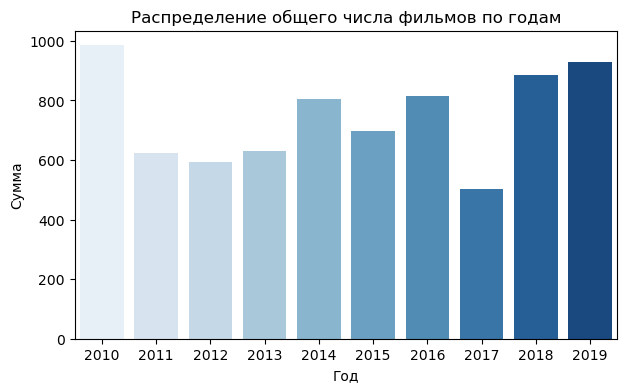

In [30]:
count_off = data['year'].value_counts().reset_index()
count_off.columns = ['year', 'count']
print(count_off)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=count_off,
    x='year',
    y='count',
    palette='Blues',
)

plt.xlabel('Год')
plt.ylabel('Сумма')
plt.title('Распределение общего числа фильмов по годам')
plt.show()

Яснее не стало, построим новый график по двум параметрам распределенным по годам. Количество фильмов с информацией о прокате и без информации.

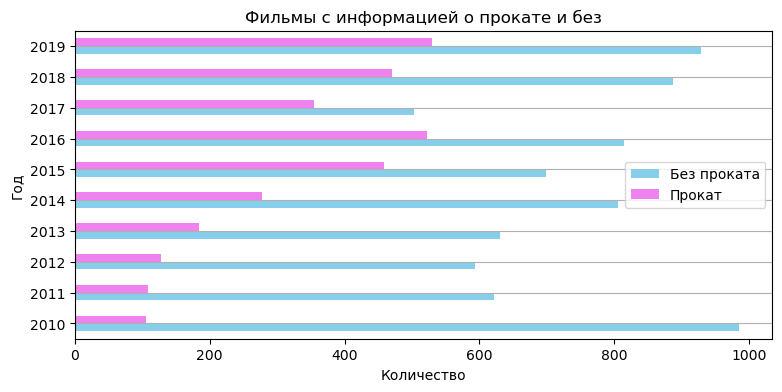

In [31]:
film_prikat = data.groupby(by='year')['box_office'].count()
film_procat_total = count_off.merge(film_prikat, on='year', how='outer')

film_procat_total.plot(
    title='Фильмы с информацией о прокате и без',
    kind='barh',
    x='year',
    y=['count','box_office'],
    color=('skyblue','violet'),
    figsize=(9,4),
    label=['Без проката','Прокат']
    
)
plt.xlabel('Количество')
plt.ylabel('Год')
plt.grid(axis='y')
plt.show()

Никакой закономерности не видно. Количество фильмов с информацией о прокате и общее количество фильмов за период с 2010 по 2020 год постоянно меняется не зависимо друг от друга. 

### 3.2 Динамика проката по годам

   year               sum
0  2010      2,428,654.00
1  2011     14,102,765.00
2  2012      6,955,423.00
3  2013     29,799,706.20
4  2014  7,434,717,843.10
5  2015 38,527,827,199.09
6  2016 46,742,316,269.48
7  2017 48,458,147,253.75
8  2018 49,251,991,405.20
9  2019 48,278,101,953.08


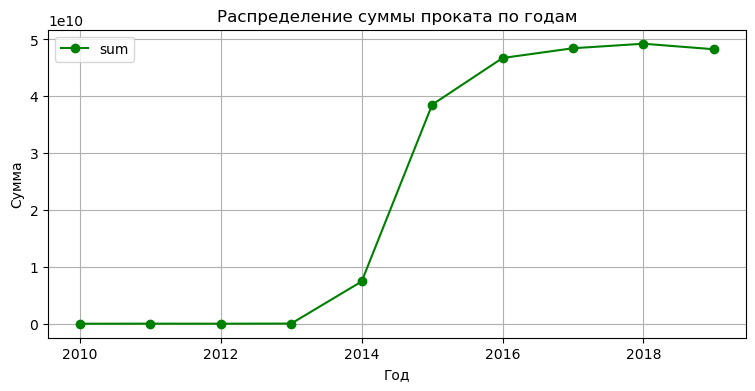

In [32]:
box_offy = data.groupby('year')['box_office'].sum().reset_index()

box_offy.columns = ['year', 'sum']
print(box_offy)

box_offy.plot(
    style='o-',
    x='year', 
    y='sum', 
    figsize=(9,4), 
    color='green', 
    xlabel='Год', 
    ylabel=('Сумма руб.'), 
    grid=True
)
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.title('Распределение суммы проката по годам')
plt.show()

За 2010 год общяя сумма проката составила 2,428,654 р, что является минимальным значением за период с 2010 по 2019 год включительно. В 2018 году 49,668,403,134 р., что является максимальным значением за все годы. Пик суммы, как и пик доли, с 2014 по 2019 г.. Посмотрим сколько в среднем собирал один фильм за год.

### 3.3 Средняя и медианная сумма сборов

           median           mean
       box_office     box_office
year                            
2010     1,700.00      23,130.04
2011     3,000.00     129,383.17
2012     5,660.00      54,339.24
2013     3,522.50     161,954.92
2014    18,137.50  26,743,589.36
2015 4,784,781.50  83,938,621.35
2016 3,776,087.56  89,373,453.67
2017 9,919,415.00 136,501,823.25
2018 8,751,895.75 104,568,983.88
2019 4,601,033.60  91,262,952.65
            median           mean
        box_office     box_office
count        10.00          10.00
mean  3,186,523.34  53,275,823.15
std   3,826,429.00  52,979,855.44
min       1,700.00      23,130.04
25%       4,056.88     137,526.11
50%   1,897,112.53  55,341,105.36
75%   4,738,844.53  90,790,577.91
max   9,919,415.00 136,501,823.25


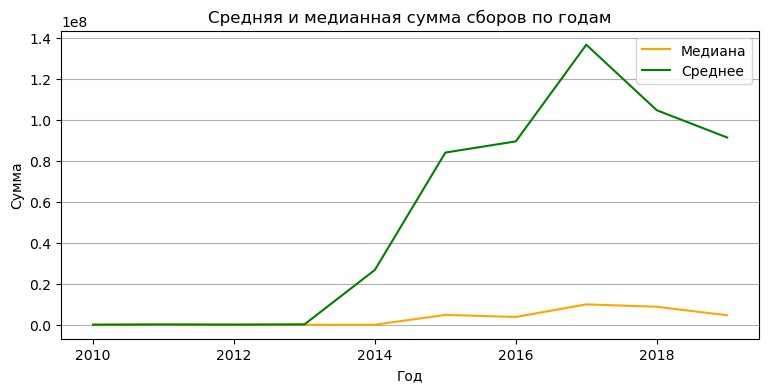

In [33]:
data_pt = data.pivot_table(
    index='year',
    values='box_office',
    aggfunc=['median','mean']
)
print(data_pt)
print(data_pt.describe())

data_pt.plot(
    title='Cредняя и медианная сумма сборов по годам',
    kind='line',
    y=['median','mean'],
    color=('orange','green'),
    figsize=(9,4),
    label=['Медиана','Среднее']
)
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.grid(axis='y')
plt.show()

График показательный. Медиана более чем в два раза меньше среднего в период с 2015 по 2020 год. Интересно то, что с 2010 по 2013 медиана и среднее примерно совпадали, затем среднее сремительно выросло и достигло пика в 2017 году. Стандартное отклонение составляет у кассовых сборов 240 млд.р. Думаю, что рост среднего связан с тем, что в России растет (и на сегодняшний день) количество кинотеатров и популяризация российского кино, так же наличие вип-залов, премьер, различных мероприятий в кинотеатрах, за счет чего цены в кино имеют сильный разброс. Но медиана устойчива к выбросам, поэтому имеем возможность наблюдать, что на самом деле цены с 2014 года действительно немного выросли, но не на такие большие значения, как показывает среднее. Так же сильный разброс в сумме сборов связан с наличием крайне успешных фильмов, но большая часть фильмов имеет небольшие сборы.

### 3.4 Влияние возрастных ограничений на сборы фильмов с 2015 по 2019 год

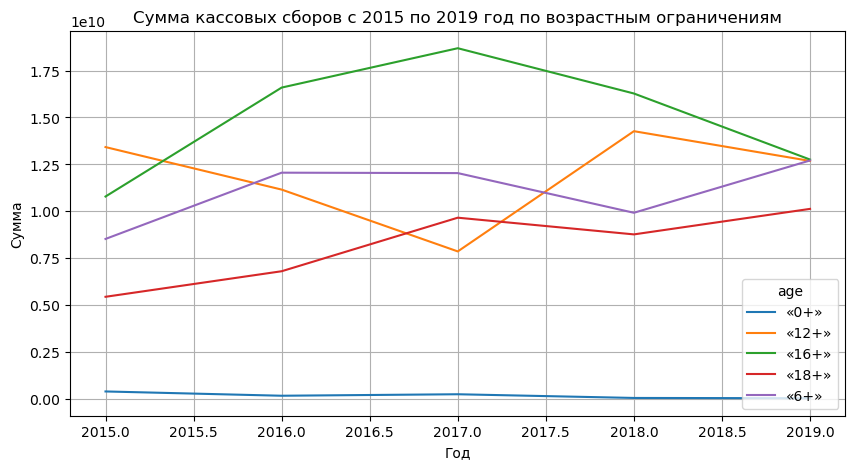

In [34]:
# добавляем новый столбец age с обрезанным значением возрастного ограничения
data['age'] = data['age_restriction'].str.split(' - ').str[0]

year = data.query('year >= 2015 and year <= 2019')
age_year = year.pivot_table(
    index='year',
    columns='age',
    values='box_office',
    aggfunc='sum'
).plot(
    kind='line',
    figsize=(10,5),
    title='Сумма кассовых сборов с 2015 по 2019 год по возрастным ограничениям',
    grid=True
)
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.show()

С 2015 года фильмы, ориентированные на аудиторию старше 16 лет, демонстрируют наивысшие кассовые сборы, достигнув пика в 2017 году. В то же время, фильмы для детей старше 0 лет показали наименьшие результаты кассовых сборов за весь исследуемый период. Интересно, что к 2019 году все группы фильмов, за исключением категории для детей старше 0 лет и фильмов, запрещённых для несовершеннолетних, достигли одинакового уровня сборов. Это можно рассматривать как отражение роста интереса к посещению кинотеатров среди зрителей всех возрастных категорий связанным с увеличением количества кинотеатров и их популяризации. 

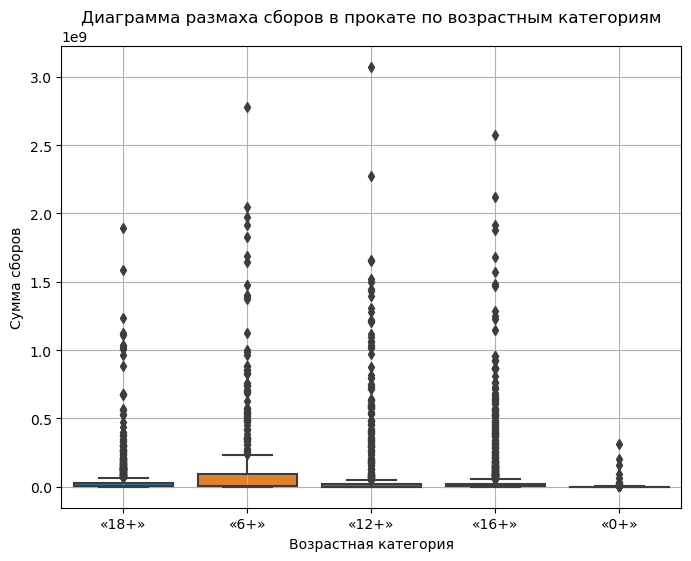

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='box_office', data=data)
plt.title('Диаграмма размаха сборов в прокате по возрастным категориям')
plt.grid(True)
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов')
plt.show()

E:\Anaconda2\envs\practicum\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


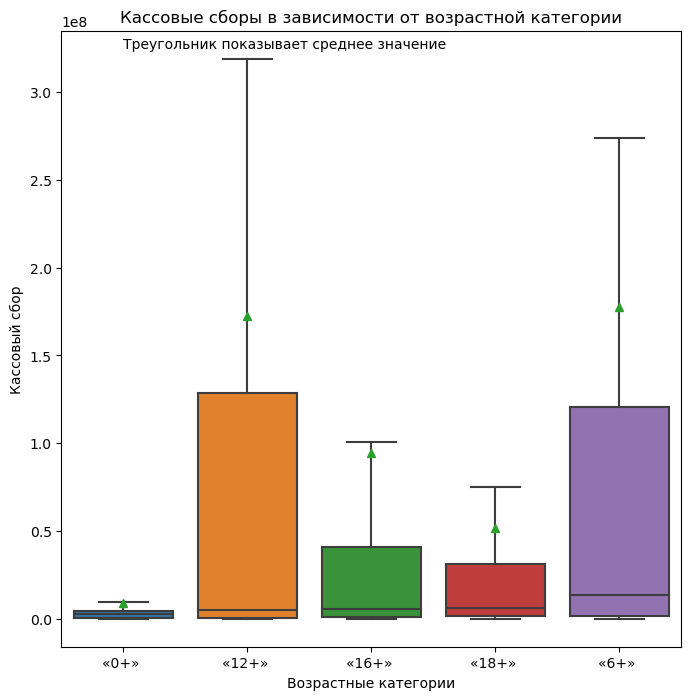

In [36]:
import seaborn as sns
temp = data[data.box_office > 0].copy()
def get_first_value(s, sep = ','):  
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))

year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.25e8,'Треугольник показывает среднее значение')
plt.show()

У всех категорий кроме "6+" медиана располагается на значениях ближе к 0.0, у категории "6+" медиана располагается немного повыше. Такое расположение Q2 означает, что фильмы категории "6+" имеют стабильно более высокие сборы, чем осталные фильмы. Так же категория "6+" имеет в сравнении с остальными категориями имеет более стальбильные суммы сборов, это видно по объемному межквартильному размаху и по длине правого уса. Наперекор "6+" стоит категория "12+" с крайне нестабильными суммами сборов, за счет чего межквартильный размах слабо визуализируется и имеется большое количество "выбросов", кторые можно объяснить наличием крайне успешных фильмов с необычно высокими суммами сборов. С помощью погодового определения среднего и медианного показателя сумм сбора было определено, что среди фильмов с 2014 года появились крайне успешные фильмы, но большая частоь фильмов несет небольшую прибыль.

### 3.5 Промежуточный вывод

**Цель исследования:**
Изучение рынка российского кинопроката и кассовых сборов.

**Задачи:**
1. Исследовать количество фильмов в прокате.
2. Анализировать динамику кассовых сборов по годам.
3. Выявить влияние возрастных ограничений на кассовые сборы.

**Основные выводы:**

1. **Объем данных:**
В наборе данных представлен **3141 фильм**, что составляет **42%** от общего числа фильмов, вышедших в прокат за период с **2010 по 2019 год** включительно.

2. **Годы и информация о прокате:**
- **2017 год** является самым представительным: доля фильмов с информацией о прокате составила более **0.7**.
- Период с **2015 по 2019 год** в среднем представлен более чем на **0.5**.
- В последние два года (**2018 и 2019**) наблюдается снижение доли фильмов с информацией о прокате, колеблющаяся между **0.5 и 0.6**.

3. **Финансовые показатели:**
- **Минимальная сумма сборов** была зафиксирована в **2010 году** и составила **2,428,654 рубля**.
- **Максимальная сумма сборов** была достигнута в **2018 году** — **49,668,403,134 рубля**.
- Начиная с **2014 года**, общая сумма кассовых сборов показала устойчивый рост.

4. **Возрастные категории и влияние на сборы:**
- **Самой стабильной и прибыльной категорией** являются фильмы с возрастным ограничением **&quot;6+&quot;**.
- Фильмы с категорией **&quot;+0&quot;** считаются **самой неприбыльной группой** с постоянно низкими кассовыми сборами.
- В категории **&quot;12+&quot;** находится наибольшее количество успешных фильмов, хотя эта категория в целом приносит **скромную прибыль**.

# Шаг 4

### 4.1 Исследование количества и долей фильмов получивших государственную поддержку

Посмотрим сколько фильмов получило государственную поддержку.

Всего государственную поддержку получило 315 фильмов.
year
2013     2
2014    15
2015    80
2016    58
2017    39
2018    52
2019    69
dtype: int64


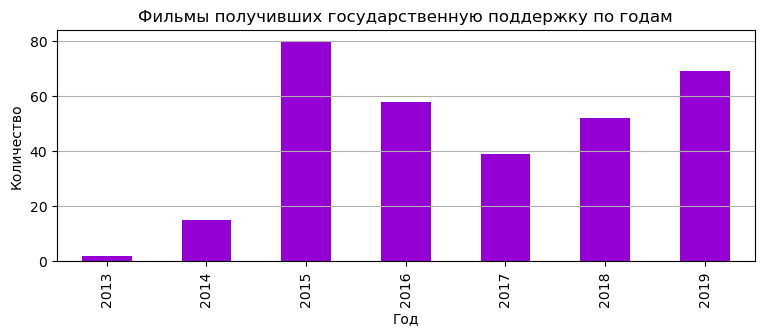

In [37]:
share_of_support = data.loc[data['budget'] !=0].copy()
total_support = share_of_support['nonrefundable_support'] + share_of_support['refundable_support']
print(f'Всего государственную поддержку получило {len(share_of_support)} фильмов.')

support_by_year = total_support.groupby(share_of_support['year']).count()
print(support_by_year)

support_by_year.plot(
    title='Фильмы получивших государственную поддержку по годам',
    kind='bar',
    color='darkviolet',
    figsize=(9,3),
    
)
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.show()

Фильмы начали получать гос финансирование в 2013 году, стартом послуижли 2 фильма получивших гос поддержку. Больше всего фильмов получили государственную поддержку в 2015 году, было профинансировано 86 фильмов. В период с 2016 по 2019 год оказывали поддержку более 40 фильмам в год. В 2019 году 70 фильмов получили финансирование.

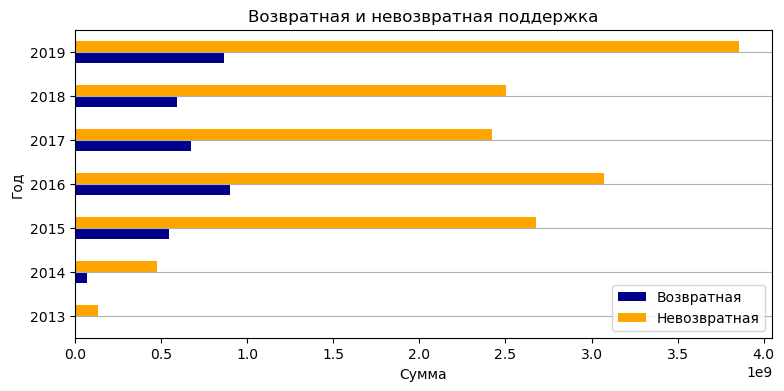

In [38]:
kind_of_support = share_of_support.groupby('year')[['refundable_support', 'nonrefundable_support']].sum()
kind_of_support.plot(
    title='Возвратная и невозвратная поддержка',
    kind='barh',
    y=['refundable_support','nonrefundable_support'],
    color=('darkblue','orange'),
    figsize=(9,4),
    label=['Возвратная','Невозвратная']
    
)
plt.xlabel('Сумма')
plt.ylabel('Год')
plt.grid(axis='y')
plt.show()

Большая сумма государственной поддержки приходится на невозвратную.

financing_source
Министерство культуры               163
Фонд кино                           131
Министерство культуры, Фонд кино     21
Name: count, dtype: int64


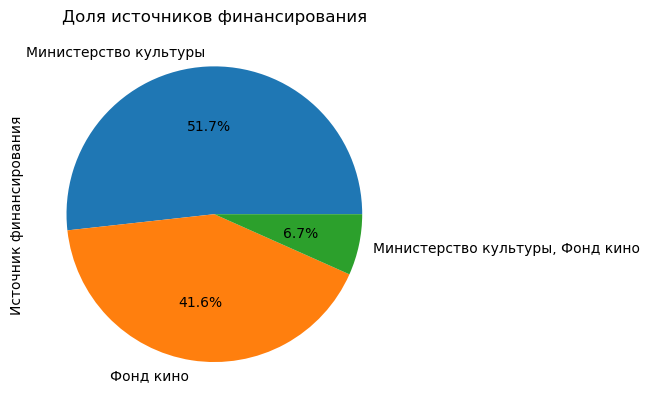

In [39]:
share_of_support['financing_source'].value_counts().plot(
    kind='pie',
    label='Источник финансирования',
    autopct='%1.1f%%',
    title='Доля источников финансирования'
)
print(share_of_support['financing_source'].value_counts())

Министерство культуры выделило средства на 164 фильма, что является максимальным показателем. Фонд кино поддержал 146 фильмов. Кроме того, оставшиеся 22 фильма получили финансирование от обеих организаций.

**Общий вывод:** всего гос поддержку получило 315 фильмов. Более 60% суммы является невозвратной поддержкой. Большую часть фильмов профинансировало Министрество культуры.

### 4.2 Исследование предпочтений Фонда кино и Министерства культуры

Проведем исследование, чтобы узнать, какие жанры фильмов, режиссеры, тип фильма и возрастные ограничения чаще всего получают государственную поддержку. Это позволит выявить тенденции и понять, какие факторы влияют на получение финансовой поддержки.

In [40]:
financing_genre = share_of_support.groupby('main_genre')['financing_source'].count()
print(financing_genre)

main_genre
аниме               0
биография           3
боевик              5
вестерн             0
военный             9
детектив            5
детский             4
для взрослых        0
документальный      0
драма              92
история             4
комедия            68
концерт             0
короткометражка     0
криминал            3
мелодрама          14
музыка              0
мультфильм         26
мюзикл              4
приключения         7
реальное ТВ         1
семейный            7
спорт               3
триллер            14
ужасы              10
фантастика         10
фильм-нуар          0
фэнтези            11
Name: financing_source, dtype: int64


C:\Users\Alex\AppData\Local\Temp\ipykernel_3892\3905109563.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  financing_genre = share_of_support.groupby('main_genre')['financing_source'].count()


Жанр драмы чаще всего получает финансовую поддержку. Благодаря Фонду кино и Министерству культуры сняты 93 таких фильма. Комедии занимают второе место по популярности - их создано 74. А вот жанры биографии, криминала и реалити-ТВ оказались наименее востребованными - для них сняли всего по три и одному фильму соответственно.

In [41]:
financing_director = share_of_support.groupby('main_director')['financing_source'].count()
financing_director_sorted = financing_director.sort_values(ascending=False)
print(financing_director_sorted.head(20))

main_director
Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
А.Цицилин        3
Д.Шмидт          3
С.Мокрицкий      3
К.Шипенко        3
А.Котт           3
А.Аксененко      3
А.Пиманов        2
Н.Джорджадзе     2
А.Прошкин        2
Н.Меркулова      2
А.Пармас         2
С.Подгаевский    2
М.Расходников    2
А.Темников       2
Т.Бекмамбетов    2
Н.Хомерики       2
А.Федорченко     2
Name: financing_source, dtype: int64


Анализируя данные, можно сделать вывод, что наиболее часто поддерживаются  фильмы снятые режиссерами Р. Давлетьяровым (5 раз), Д. Дьяченко (4 раза) и С. Андреасяном (также 4 раза). Эти три имени явно выделяются среди остальных, так как они получили наибольшее количество поддержки. За ними следуют С. Мокрицкий, А. Цицилин, Н. Хомерики, А. Котт, Д. Шмидт, К. Шипенко и А. Аксененко, каждый из которых получил по три поддержки. Остальные режиссеры получили финансирование 2 или 1 фильма.

age
«0+»       8
«12+»    103
«16+»    118
«18+»     27
«6+»      59
Name: financing_source, dtype: int64


<Axes: title={'center': 'Доля возрастной категории'}, ylabel='Проценты'>

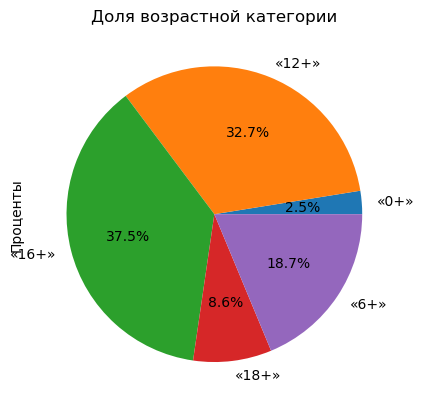

In [42]:
financing_age_restriction = share_of_support.groupby('age')['financing_source'].count()
print(financing_age_restriction)
financing_age_restriction.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Доля возрастной категории',
    label='Проценты'
)

Больше всего профинансировано фильмов с возрастным порогом в 12+ и 16+ лет. Учитывая, что ранее установили, что самым популярным для финансирования жанром является драма, то возрастные ограничения соответствуют.

type
Анимационный       25
Документальный      1
Художественный    289
Name: financing_source, dtype: int64


<Axes: title={'center': 'Доля типов'}, ylabel='Тип'>

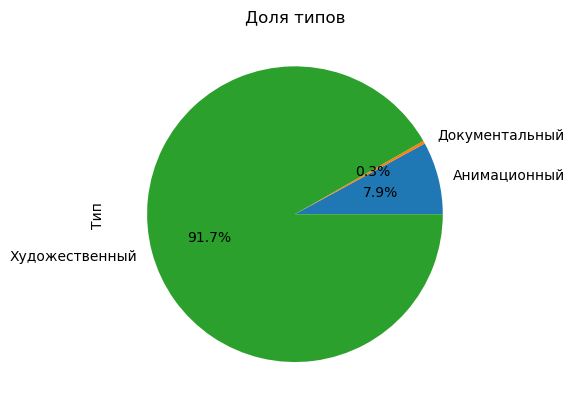

In [43]:
financing_type = share_of_support.groupby('type')['financing_source'].count()
print(financing_type)
financing_type.plot(
    kind='pie',
    label='Тип',
    autopct='%1.1f%%',
    title='Доля типов'
)

Из 332 профинансированных государством фильмов 300 являются художественными, 31 анимационным, и 1 документальным.

### 4.3 Исследование предпочтений зрителей

Исследуем предпочтения зрителей по тем же параметрам, что и предпочтения фондов, но критерием предпочтений будет рейтинг.

In [44]:
average_ratings_support = share_of_support.groupby('main_genre')['ratings'].mean()

highest_genre_s = average_ratings_support.idxmax()  
highest_rating_s = average_ratings_support.max()  
print(f'Жанр с самым высоким рейтингом: {highest_genre_s}, рейтинг: {highest_rating_s}')

res = pd.concat([average_ratings_support, financing_genre], axis=1)
res.columns = ['average_ratings_support', 'financing_genre']
print(res)

Жанр с самым высоким рейтингом: криминал, рейтинг: 7.5
                 average_ratings_support  financing_genre
main_genre                                               
аниме                                NaN                0
биография                           6.90                3
боевик                              6.34                5
вестерн                              NaN                0
военный                             6.47                9
детектив                            6.76                5
детский                             7.12                4
для взрослых                         NaN                0
документальный                       NaN                0
драма                               6.42               92
история                             5.35                4
комедия                             5.52               68
концерт                              NaN                0
короткометражка                      NaN                0
криминал         

C:\Users\Alex\AppData\Local\Temp\ipykernel_3892\2485357425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_support = share_of_support.groupby('main_genre')['ratings'].mean()


Если смотреть только на фильмы которые получили государственное финансирование, то зрители выше всего оценивают фильмы в жанре криминал, в среднем на 7.50 из 3 фильмов. А ниже всего оценивают жанр ужасы, в среднем из 10 фильмов в 5.20. Самый популярный жанр для финансирования - драму в среднем оценивают на 6.42. 

In [45]:
popular_director_s = share_of_support.groupby('main_director')['ratings'].mean()
popular_director_sorted_s = popular_director_s.sort_values(ascending=False)

pd_count_s = data.groupby('main_director')['ratings'].count()
pdir_s = pd.concat([popular_director_sorted_s, pd_count_s], axis=1)
pdir_s.columns = ['popular_director_sorted_s', 'pd_count_s']
print(pdir_s.head(20))

                                   popular_director_sorted_s  pd_count_s
main_director                                                           
Ю.Кара                                                  9.40           2
Н.Степанова при участии С.Иванова                       9.00           1
Р.Прыгунов                                              8.20           2
А.Атанесян                                              8.10           3
А.Попова                                                8.00           2
К.Оганисян                                              7.90           2
И.Шахназаров                                            7.80           1
В.Татарский                                             7.80           1
А.Игудин                                                7.70           1
А.Учитель                                               7.70           3
М.Михайлова                                             7.70           1
Н.Лебедев                                          

Среди режиссеров, которые работали с фильмами финансируемыми государством, выделяются высокие рейтинги у режиссеров, которые представили более 2-х работ за исследуемый период.

In [46]:
popular_age_restriction_s = share_of_support.groupby('age_restriction')['ratings'].mean()
print(popular_age_restriction_s)

age_restriction
«0+» - для любой зрительской аудитории   6.41
«12+» - для детей старше 12 лет          6.05
«16+» - для детей старше 16 лет          5.96
«18+» - запрещено для детей              6.26
«6+» - для детей старше 6 лет            6.03
Name: ratings, dtype: float64


C:\Users\Alex\AppData\Local\Temp\ipykernel_3892\1523087926.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_age_restriction_s = share_of_support.groupby('age_restriction')['ratings'].mean()


На оценку зрителями фильмов не влияет возрастная категория, средняя оценка у всех категорий варируется от 6 до 7. Можно выделить категорию "16+", средняя оценка чуть ниже, чем у остальных категорий и равна 5.96.

In [47]:
popular_type_s = share_of_support.groupby('type')['ratings'].mean()
print(popular_type_s)

type
Анимационный     5.85
Документальный   8.00
Художественный   6.05
Name: ratings, dtype: float64


У фильмов снятых с гос поддержкой выделились документальные фильмы со средним рейтингом 8.0, художественные, как самая массовая группа по количеству фильмов, набрала средний рейтинг 6.05.

In [48]:
total_sup_rating = share_of_support['ratings'].median()
print(f'Общий усредненный рейтинг кино снятого при поддержке {total_sup_rating}')

Общий усредненный рейтинг кино снятого при поддержке 6.2


### 4.4 Окупаемость

In [49]:
share_of_support.loc[:, 'profitableness'] = share_of_support['box_office'] - share_of_support['budget'] 
share_of_support['profitableness'].describe()

count              301.00
mean        -4,139,510.26
std        320,425,917.81
min     -1,971,477,243.41
25%        -73,322,125.00
50%        -43,363,736.00
75%        -14,779,098.53
max      2,913,568,690.79
Name: profitableness, dtype: float64

Посмотрим окупаемость на графике по годам.

year
2013     -235,113,004.90
2014     -272,296,632.50
2015   -2,451,922,802.17
2016   -2,252,512,301.33
2017    3,892,942,769.20
2018    2,865,962,647.13
2019   -2,793,053,263.88
Name: profitableness, dtype: float64


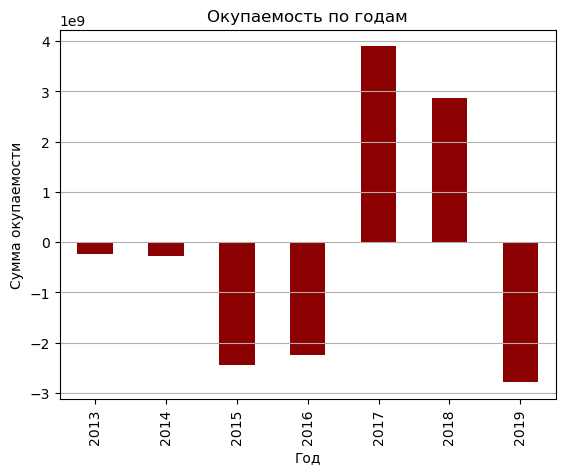

In [50]:
profitableness_graf = share_of_support.groupby('year')['profitableness'].sum()
print(profitableness_graf )
profitableness_graf.plot(
    kind='bar',
    title='Окупаемость по годам',
    color='darkred'
)
plt.xlabel('Год')
plt.ylabel('Сумма окупаемости')
plt.grid(axis='y')
plt.show()

2019 год был самым неприбыльным  -2,793,053,263.88.. С 2013 по 2017 год окупаемость была минусовой, в 2013 и 2014 менее минусовой, чем в 2015 и 2016, это связанно с тем, что в 2013 и 2014 году было снято мало фильмов (2 и 15 соответственно). В 2017 году окупаемость резко вышла в плюс (3,892,942,769.20), в 2018 году 2,865,962,647.13. В 2019 году опять минусовое значение, которое является максимальным. Изучим какие жанры самые убыточные.

C:\Users\Alex\AppData\Local\Temp\ipykernel_3892\88871624.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_profitableness = share_of_support.groupby('main_genre')['profitableness'].sum()


main_genre
аниме                          0.00
биография            -12,050,599.36
боевик              -204,080,311.90
вестерн                        0.00
военный             -268,236,353.20
детектив          -1,059,674,785.60
детский             -136,284,352.00
для взрослых                   0.00
документальный                 0.00
драма             -1,710,171,948.96
история             -689,593,971.43
комедия            6,436,109,647.39
концерт                        0.00
короткометражка                0.00
криминал            -186,800,918.00
мелодрама           -812,450,383.87
музыка                         0.00
мультфильм          -221,862,274.70
мюзикл              -462,492,467.02
приключения       -2,111,269,212.38
реальное ТВ          -47,278,896.57
семейный             -19,375,037.35
спорт              2,257,299,422.44
триллер             -815,707,149.89
ужасы                146,245,564.35
фантастика          -569,218,024.61
фильм-нуар                     0.00
фэнтези          

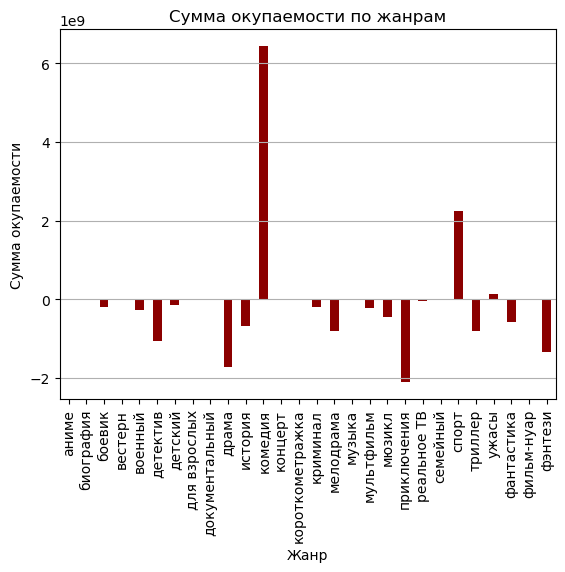

In [51]:
genre_profitableness = share_of_support.groupby('main_genre')['profitableness'].sum()
print(genre_profitableness)

genre_profitableness.plot(
    kind='bar',
    title='Сумма окупаемости по жанрам',
    color='darkred'
)
plt.xlabel('Жанр')
plt.ylabel('Сумма окупаемости')
plt.grid(axis='y')
plt.show()

Самую высокую прибыль принес жанр "комедия" за 68 фильмов 6,436,109,647 р., второй по прибыльности жанр "спорт", за 3 фильма  2,257,299,422 р. Самый убыточный жанр "приключения"  -2,111,269,212.38 за 7 фильмов.  
Изучим окупаемость по рейтингу. Создадим новый столбец <span style="color:blue"> ratings_type</span> в котором распределим цифровые значения рейтинга:  
* от 0.0 до 2.5 - очень низкий;
* от 2.5 до 5.0 - низкий;
* от 5.0 до 7.5 - средний;
* от 7,5 до 10.0 - высокий.

ratings_type
очень низкий     -112,139,639.10
низкий         -1,525,568,868.60
средний           488,648,450.23
высокий          -682,119,152.22
Name: profitableness, dtype: float64


C:\Users\Alex\AppData\Local\Temp\ipykernel_3892\3571630102.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_profitableness = share_of_support.groupby('ratings_type')['profitableness'].sum()


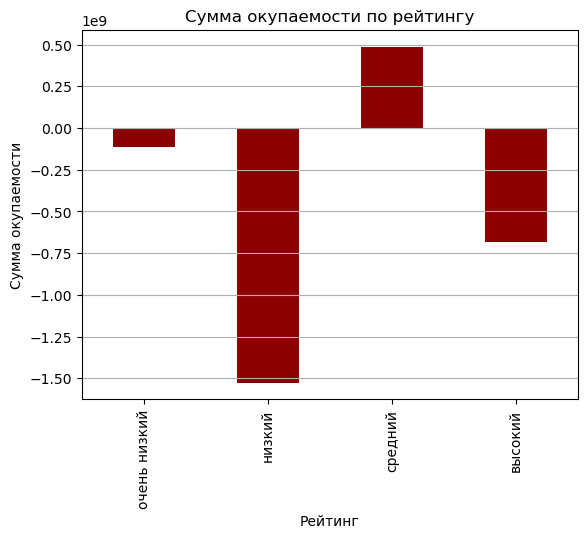

In [52]:
# напишем функцию для определения типа рейтинга
def add_ratings_type(df):
    bins = [0, 2.5, 5, 7.5, 10]
    labels = ['очень низкий', 'низкий', 'средний', 'высокий']
    df['ratings_type'] = pd.cut(df['ratings'], bins=bins, labels=labels, right=True)
    return df

share_of_support = add_ratings_type(share_of_support)

ratings_profitableness = share_of_support.groupby('ratings_type')['profitableness'].sum()
print(ratings_profitableness)

ratings_profitableness.plot(
    kind='bar',
    title='Сумма окупаемости по рейтингу',
    color='darkred'
)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма окупаемости')
plt.grid(axis='y')
plt.show()

Низкий рейтинг принес больше всего убытка -1,525,568,868, средний рейтинг единственный, кто принес прибыль  488,648,450р..

Изучим долю государственной поддержкой от общего бюджета по годам. Столбец <span style="color:blue">share_of_support</span> был создан на этапе подготовки данных к исследованию.

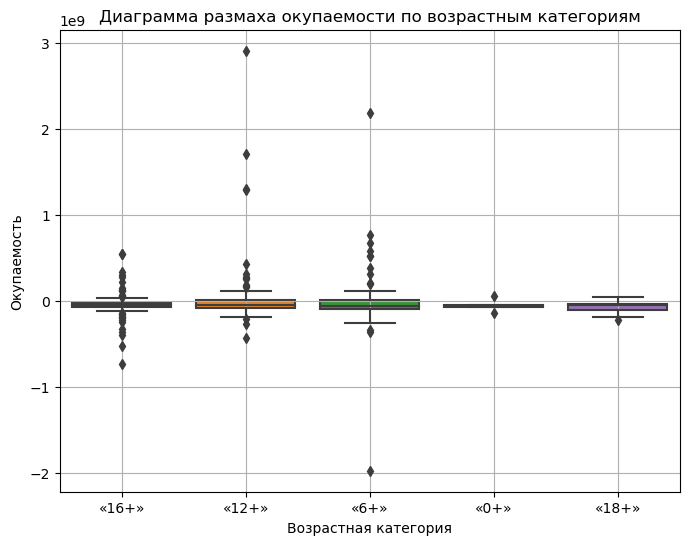

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='profitableness', data=share_of_support)
plt.title('Диаграмма размаха окупаемости по возрастным категориям')
plt.grid(True)
plt.xlabel('Возрастная категория')
plt.ylabel('Окупаемость')
plt.show()

Медианное значение у всех возрастных категорий ближе ниже 0. Все возрастные категории убыточны. При этом имеются выбросы на высоких значениях у фильмов категории "12+" и "6+". Категория "18+" без выбросов, все значения находятся в пределах усов ящика, кргоме одного отрицательного значения в сторону левого уса.

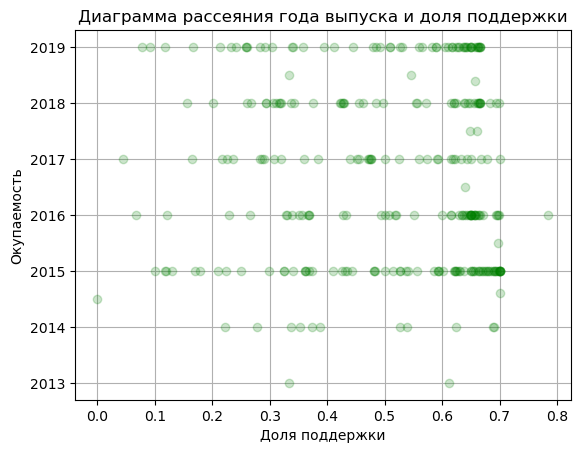

In [54]:
share_support = data.groupby('share_of_support')['year'].mean()
share_support.plot(style='o', alpha=0.2,color='green')
plt.title('Диаграмма рассеяния года выпуска и доля поддержки')
plt.grid(True)
plt.xlabel('Доля поддержки')
plt.ylabel('Окупаемость')
plt.show()

В среднем все фильмы получили поддержку до 75% от общего бюджета.

### 4.5 Промежуточный вывод

**Цель раздела:**
Исследовать популярность и прибыльность фильмов, получивших государственную поддержку.

**Задачи:**
1. Изучение количества и доли фильмов, получивших государственную поддержку.
2. Выявление предпочтений заказчиков.
3. Анализ предпочтений зрителей и окупаемости.

**Общая информация:**
- **Год начала финансирования:** 2013
- **Количество профинансированных фильмов:** 315

**Жанры и их характеристики:**
1. **Жанры:**
- Наибольшее количество фильмов снято в жанрах:
- Драма: Средняя оценка зрителей - **6.45**
- Комедия: Средняя оценка зрителей - **5.52**

2. **Возрастные группы:**
- Наибольшее количество фильмов имеет возрастной порог 12+ (средняя оценка - **6.05**) и 16+ (средняя оценка - **5.96**).

3. **Тип фильма:**
- 300 из 315 фильмов относятся к художественным, средняя оценка зрителей - **6.05**.

4. **Жанровые рейтинги:**
- Самая высокая оценка зрителей у жанра криминал: **7.5**.
- Самая низкая оценка у жанра ужасы: **5.2**.

**Режиссеры:**
- Наибольшее количество фильмов сняли:
- Р. Давлетьяров - 5 фильмов
- Д. Дьяченко - 4 фильма
- С. Андреасян - 4 фильма

**Самые высокие оценки получили режиссеры:**
- Ю. Кара: **9.40**
- Н. Степанова при участии С. Иванова: **9.00**
- Р. Прыгунов: **8.2**

**Общий усредненный рейтинг**: **6.2**
  
**Финансовая статистика:**

- **Прибыльные годы:**
- 2017: **3,892,942,769 р.**
- 2018: **2,865,962 р.**

- **Убыточные годы:**
- 2019 был самым неприбыльным: **-2,793,053,263 р.**

**Жанровая прибыльность:**
- Жанр **комедия** принес наибольшую прибыль: **6,436,109,647 р.**
- Второй по прибыльности жанр - **спорт**: **2,257,299,422 р.**
- Самый убыточный жанр: **приключения**: **-2,111,269,212.38 р.**

**Выводы:**
- Фильмы со средним рейтингом являются единственной группой, которая приносит прибыль, в отличие от фильмов с очень низким, низким и высоким рейтингами.
- Важно обратить внимание на предпочтения зрителей и успехи определённых жанров, что может помочь в дальнейшем планировании финансирования и продюсировании кинопроектов.

# Шаг 5

**Общий вывод.** 
Целью данного исследования было выявление текущих трендов на рынке российского кинопроката, с акцентом на фильмы, получивших государственную поддержку. В процессе работы были выполнены следующие задачи:

1. **Знакомство с данными**: На первом этапе была проведена интеграция двух датафреймов, в результате чего получен набор данных, содержащий 16 столбцов и 7486 строк, охватывающий период с 2010 по 2019 год включительно.

2. **Предобработка данных**: Данный этап включал в себя преобразование типов данных, обработку пропущенных значений и выявление дубликатов в столбце с номерами прокатных удостоверений без последующих действий по их устранению. Обработаны аномалии в заполнении категориальных и количественных столбцов, что могло произойти из-за ошибок при внесении данных. Удалены 17 строк с нулевым значением бюджета, также созданы 4 новых столбца для дальнейшего анализа.

3. **Изучение рынка кинопроката**: В наборе данных представлено 3141 фильм, что составляет 42% от общего числа вышедших в прокат фильмов за указанный период. Наблюдается снижение доли фильмов с информацией о прокате в 2018 и 2019 годах, доля которых между 0.5 и 0.6. Минимальные сборы составили -2,428,654 рубля (2010г.), а максимальные – 49,668,403,134 рубля (2018г.). С 2014 года суммы сборов ежегодно растут. Наиболее стабильными являются фильмы с возрастным ограничением "6+", в то время как фильмы с маркировкой "0+" демонстрируют постоянно низкие кассовые сборы.

4. **Исследование популярности и прибыльности**: С момента начала финансирования в 2013 году было профинансировано 315 фильмов. Наиболее частые жанры среди таких фильмов – драма и комедия, а также возрастные ограничения 12+ и 16+. Режиссеры Р. Давлетьяров и Д. Дьяченко чаще всего получают поддержку. Высокие оценки от зрителей получают криминальные фильмы (средняя оценка 7.5), а также работы режиссеров Ю. Кара (9.40) и Н. Степанова (9.00). Средняя общая оценка фильмов составила 6.2. Самый прибыльный год - 2017, с суммой сборов 3,892,942,769 рублей, тогда как 2019 оказался убыточным (-2,793,053,263 рублей). Комедия признана самым прибыльным жанром (6,436,109,647 рублей), а приключения – самым убыточным (-2,111,269,212.38 рублей). Фильмы со средними рейтингами(от 5.0 до 7.5) остаются единственной группой, приносящей прибыль.

В заключение, количество фильмов, созданных с государственной поддержкой, с 2017 года растет, и они стабильно получают средние оценки от зрителей. Хотя среди таких фильмов встречаются явные лидеры по кассовым сборам и высоким оценкам, в целом они интересуют зрителей лишь в умеренной степени. Большинство фильмов в данной категории не имеют широкой популярности, что отражается на их окупаемости.